[277.309   256.49817 243.00587 234.90242 230.73291 260.97284 243.48769
 233.42589 227.90892 223.3205  222.38823 217.28026 215.76637 219.2648
 207.75093 191.22722 184.68347 189.1962  177.75656 171.7123  142.32411
 132.43077 129.6299  126.65661 124.92829]


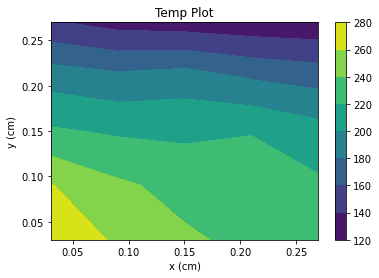

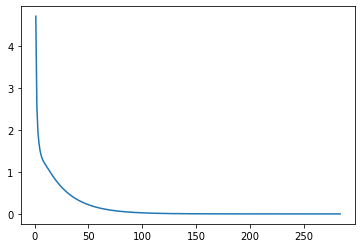

In [36]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
Nx=5
Ny=5
L=0.3
H=0.4
dx=np.zeros(Nx+1)
dy=np.zeros(Nx+1)
dx[0]=L/Nx
dy[0]=L/Ny
for i in range(1,Nx+1):
    dx[i]=dx[i-1]*1
for i in range(1,Ny+1):
    dy[i]=dy[i-1]*1
cx=np.zeros(Nx+1)
cy=np.zeros(Ny+1)
node_x=np.zeros(Nx)
node_y=np.zeros(Ny)
for i in range(1,Nx+1):
    cx[i]=cx[i-1]+dx[i]
for i in range(0,Nx):
    node_x[i]=(cx[i]+cx[i+1])/2
for i in range(1,Ny+1):
    cy[i]=cy[i-1]+dy[i]
for i in range(0,Ny):
    node_y[i]=(cy[i]+cy[i+1])/2 
# [X,Y] =np.meshgrid(x,y)
for i in range(0,Nx+1):
    cx[i]=(cx[i]/cx[-1])*L
for i in range(0,Nx+1):
    cy[i]=(cy[i]/cy[-1])*H
[X,Y]=np.meshgrid(node_x,node_y)
# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

dx_1=L/Nx #### to avoid initial confusion we ignore streatching case ############ 
dy_1=H/Ny #### to avoid initial confusion we ignore streatching case ############
#..............................................
k= 1000
q=0
qw=500000
T3=100
#Area=1
N=Nx*Ny
key=0
epc=10**(-5)
T_0=np.zeros(N,dtype=np.float32)
V=np.zeros(N,dtype=np.float32)
T=np.zeros(N,dtype=np.float32)
residu=[]
itaration=[]
count=0
j=0
while(key==0):
    for i in range(0,N):
        if(i==0): #1
            Aw=0
            Ae=k*dy_1/dx_1*0.01
            An=k*dx_1/dy_1*0.01
            As=0
            Sp=0                            #-(2*k*dy_1)/dx_1 -(2*k*dx_1)/dy_1
            Su=qw*dy_1*0.01                 #(q*dy_1*dx_1)+((2*k*dy_1)/dx_1)*T4+((2*k*dx_1)/dy_1)*T1
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+An*T[Nx]+Su)/Ap
        elif(i==(Nx -1)):#3
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=(k*dx_1)/dy_1*0.01
            As=0
            Sp=0                          #-(2*k*dy_1)/dx_1-(2*k*dx_1)/dy_1
            Su=0                          #(q*dy_1*dx_1) + ((2*k*dy_1)/dx_1)*T2 +((2*k*dx_1)/dy_1)*T1
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Aw*T[i-1]+An*T[i+Nx]+Su)/Ap
        elif(i==(N-1)):#9
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp-(2*k*dx_1)/dy_1*0.01
            Su=+((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Aw*T[i-1]+As*T[i-Nx]+Su)/Ap
        elif(i==(N-Nx)):#7done
            Aw=0
            Ae=(k*dy_1)/dx_1*0.01
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp= -(2*k*dx_1)/dy_1*0.01
            Su=qw*dy_1*0.01 +((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+As*T[i-Nx]+Su)/Ap
        elif(1<=i<=(Nx-2)):   #2done
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=0
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+Aw*T[i-1]+An*T[i+Nx]+Su)/Ap
        elif(i%(Nx)==(Nx-1)):#6done 
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            T[i]=(An*T[i+Nx]+As*T[i-Nx]+Aw*T[i-1]+Su)/Ap
        elif((N-Nx)<i<(N-1)):#8
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp=-(2*k*dx_1)/dy_1*0.01
            Su=((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+Aw*T[i-1]+As*T[i-Nx]+Su)/Ap
        elif(i%(Nx-1)==1):#4
            Aw=0
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=qw*dy_1*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+As*T[i-Nx]+An*T[i+Nx]+Su)/Ap
        else:#5
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+Aw*T[i-1]+An*T[i+Nx]+As*T[i-Nx]+Su)/Ap
    #Calculate Resu:
    #V=abs(T-T_0)
#     print(T)
#     print(T_0)
    count=count+1
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        key=1
    T_0=copy.copy(T)
    
#print(residu)
T_final=np.reshape(T, (Ny,Nx))
#print(itaration)
print(T)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T_final)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show()
plt.plot(itaration,residu)

# Malalasekra example problem 7.2

In [34]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
Nx=3
Ny=4
L=0.3
H=0.4
dx=np.zeros(Nx+1)
dy=np.zeros(Nx+1)
dx[0]=L/Nx
dy[0]=L/Ny
# for i in range(1,Nx+1):
#     dx[i]=dx[i-1]*1
# for i in range(1,Ny+1):
#     dy[i]=dy[i-1]*1
# cx=np.zeros(Nx+1)
# cy=np.zeros(Ny+1)
# node_x=np.zeros(Nx)
# node_y=np.zeros(Ny)
# for i in range(1,Nx+1):
#     cx[i]=cx[i-1]+dx[i]
# for i in range(0,Nx):
#     node_x[i]=(cx[i]+cx[i+1])/2
# for i in range(1,Ny+1):
#     cy[i]=cy[i-1]+dy[i]
# for i in range(0,Ny):
#     node_y[i]=(cy[i]+cy[i+1])/2 
# # [X,Y] =np.meshgrid(x,y)
# for i in range(0,Nx+1):
#     cx[i]=(cx[i]/cx[-1])*L
# for i in range(0,Nx+1):
#     cy[i]=(cy[i]/cy[-1])*H
# [X,Y]=np.meshgrid(node_x,node_y)
# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

dx_1=L/Nx #### to avoid initial confusion we ignore streatching case ############ 
dy_1=H/Ny #### to avoid initial confusion we ignore streatching case ############
#..............................................
k= 1000
q=0
qw=500000
T3=100
#Area=1
N=Nx*Ny
key=0
epc=10**(-5)
T_0=np.zeros(N,dtype=np.float32)
V=np.zeros(N,dtype=np.float32)
T=np.zeros(N,dtype=np.float32)
residu=[]
itaration=[]
count=0
j=0
while(key==0):
    for i in range(0,N):
        if(i==0): #1
            Aw=0
            Ae=k*dy_1/dx_1*0.01
            An=k*dx_1/dy_1*0.01
            As=0
            Sp=0                            #-(2*k*dy_1)/dx_1 -(2*k*dx_1)/dy_1
            Su=qw*dy_1*0.01                 #(q*dy_1*dx_1)+((2*k*dy_1)/dx_1)*T4+((2*k*dx_1)/dy_1)*T1
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+An*T[Nx]+Su)/Ap
        elif(i==(Nx -1)):#3
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=(k*dx_1)/dy_1*0.01
            As=0
            Sp=0                          #-(2*k*dy_1)/dx_1-(2*k*dx_1)/dy_1
            Su=0                          #(q*dy_1*dx_1) + ((2*k*dy_1)/dx_1)*T2 +((2*k*dx_1)/dy_1)*T1
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Aw*T[i-1]+An*T[i+Nx]+Su)/Ap
        elif(i==(N-1)):#9
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp-(2*k*dx_1)/dy_1*0.01
            Su=+((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Aw*T[i-1]+As*T[i-Nx]+Su)/Ap
        elif(i==(N-Nx)):#7done
            Aw=0
            Ae=(k*dy_1)/dx_1*0.01
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp= -(2*k*dx_1)/dy_1*0.01
            Su=qw*dy_1*0.01 +((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+As*T[i-Nx]+Su)/Ap
        elif(1<=i<=(Nx-2)):   #2done
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=0
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+Aw*T[i-1]+An*T[i+Nx]+Su)/Ap
        elif(i%(Nx)==(Nx-1) and i!=(N-1)):#6done 
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            T[i]=(An*T[i+Nx]+As*T[i-Nx]+Aw*T[i-1]+Su)/Ap
        elif((N-Nx)<i<(N-1)):#8
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp=-(2*k*dx_1)/dy_1*0.01
            Su=((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+Aw*T[i-1]+As*T[i-Nx]+Su)/Ap
        elif(i%(Ny-1)==0 and i!=(N-Nx)):#4
            Aw=0
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=qw*dy_1*0.01
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+As*T[i-Nx]+An*T[i+Nx]+Su)/Ap
        else:#5
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            T[i]=(Ae*T[i+1]+Aw*T[i-1]+An*T[i+Nx]+As*T[i-Nx]+Su)/Ap
    #Calculate Resu:
    #V=abs(T-T_0)
#     print(T)
#     print(T_0)
    count=count+1
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        key=1
    T_0=copy.copy(T)
    
#print(residu)
T_final=np.reshape(T, (Ny,Nx))
#print(itaration)
print(T_final)
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, T_final)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Temp Plot')
# ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')
# plt.savefig("output2.png",dpi=600)
# plt.show()
# plt.plot(itaration,residu)

[[260.03632 227.79846 212.16403]
 [242.27426 211.19511 196.52963]
 [205.59145 178.17816 166.22977]
 [146.32195 129.69632 123.98152]]


In [35]:
3%4

3